# Import Data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [3]:
titanic = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TheTitanic.csv')
titanic.head()

,1,2,3,4,5,6,7,8,9,10
0,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
3,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
4,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90


## Data Preprocessing 

### Create header 

In [6]:
titanic.columns = titanic.iloc[0]
titanic.head()

,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
0,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
3,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
4,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90


In [7]:
titanic = titanic[1:].reset_index(drop=True)
titanic.head()

,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90


In [8]:
titanic.rename(columns={titanic.columns[3]:'name'}, inplace=True)
titanic.head()

,sn,pclass,survived,name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90


### Split column name

In [10]:
titanic[['first_person', 'second_person']] = titanic['name'].str.split(", ", expand=True)
titanic.head()

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
0,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90,Mr. Anthony,None
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90,Mr. Anthony,None
2,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90,Master. Eugene Joseph,None
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90,Abbott,Mr. Rossmore Edward
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90,Abbott,Mr. Rossmore Edward


### Check Missing Value

In [47]:
missing_values = titanic.isnull().sum().sort_values()[titanic.isnull().sum().sort_values(ascending=False) !=0]
missing_values.head(10)

0
gender             1
family             2
fare               2
second_person      4
embarked           6
age              257
dtype: int64

#### Gender

In [14]:
titanic.gender.value_counts(dropna=False)

gender
male      835
female    465
NaN         1
Name: count, dtype: int64

In [15]:
titanic[titanic["gender"].isna()]

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90,Abbott,Mr. Rossmore Edward


In [16]:
titanic[titanic["name"] == 'Abbott, Mr. Rossmore Edward']

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90,Abbott,Mr. Rossmore Edward
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90,Abbott,Mr. Rossmore Edward


In [51]:
titanic = titanic.dropna(subset=["gender"])

In [53]:
titanic.gender.value_counts(dropna=False)

gender
male      835
female    465
Name: count, dtype: int64

In [55]:
gender_counts = titanic["gender"].value_counts()

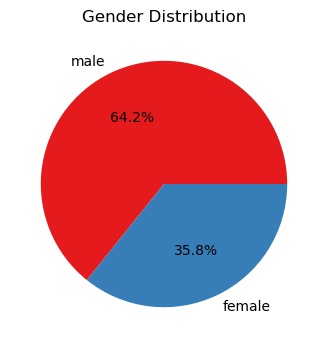

In [75]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette("Set1")  # Warna pastel
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Gender Distribution")
plt.show()

#### Family

In [91]:
titanic.family.isnull().sum()

0

In [81]:
titanic[titanic.family.isna()]

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
579,579,1,1,"Icard, Miss. Amelie",female,38,NaN,80,NaN,02-Aug-91,Icard,Miss. Amelie
1155,1155,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,NaN,80,NaN,28-Feb-93,Stone,Mrs. George Nelson (Martha Evelyn)


In [87]:
titanic[titanic["name"].isin(['Icard, Miss. Amelie', 'Stone, Mrs. George Nelson (Martha Evelyn)'])]

,sn,pclass,survived,name,gender,age,family,fare,embarked,date,first_person,second_person
579,579,1,1,"Icard, Miss. Amelie",female,38,NaN,80,NaN,02-Aug-91,Icard,Miss. Amelie
1155,1155,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,NaN,80,NaN,28-Feb-93,Stone,Mrs. George Nelson (Martha Evelyn)


In [89]:
titanic = titanic.dropna(subset=["family"])
titanic.family.isnull().sum()

0

#### Fare